In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [3]:
electric = pd.read_csv('~/Downloads/Full+Eletric+Interval+042016.csv')

In [4]:
electric['Datetime'] = pd.to_datetime(electric['Date'] + ' ' + electric['Start Time'])

In [5]:
propertyCode = pd.read_excel('~/Downloads/SIMS_Property_List_4-6-2016_Revised.xlsx')

### Codes

In [6]:
codes = pd.Series([b[0] for b in electric['Meter'].str.split()])
unicodes = codes.unique()
unicodes = pd.Series(unicodes)

### Ages

In [7]:
agelst = []

for i in unicodes:
    agelst.append(propertyCode[propertyCode['Property Code'].isin([i])]['Year Constructed'])
age = pd.DataFrame(agelst).sum(axis=1)
age = age.reset_index(drop=True)

### Areas

In [8]:
arealst = []
for b in unicodes:
    arealst.append(propertyCode[propertyCode['Property Code'].isin([b])]['FCIM Gross Area'])
area = pd.DataFrame(arealst).sum(axis=1)
area = area.reset_index(drop=True)

### Cumulative Usages

In [9]:
clst = []
for i in unicodes:
    #for each unique code, find its Usage value in master df and add them all together, then append to list
    clst.append(electric.Usage[codes.isin([i])].sum())

### Full Building Names

In [10]:
namelst = []
for i in unicodes:
    namelst.append(propertyCode[propertyCode['Property Code'].isin([i])]['Property Name'])
namelst
name = pd.DataFrame(namelst)
name = name.replace(np.nan, '', regex=True)
name = name.reset_index(drop=True)
name =name.sum(axis=1)

### Normalized Usage

In [11]:
nusage = clst/area

In [12]:
data = {'Code': unicodes,'Building': name, 'Usage': clst, 'Area': area, 'Year': age, 'Normalized Usage': nusage}

In [13]:
cdf = pd.DataFrame(data)
cdf['Building'] = cdf['Code'] + " " + cdf['Building']

In [14]:
cdf

,Area,Building,Code,Normalized Usage,Usage,Year
0,168656.27,A06 John Crerar Library,A06,17.817890,3.005099e+06,1984.0
1,69196.38,F02 Steam Plant Power Plant,F02,66.850588,4.625819e+06,1929.0
2,65745.26,G02 Chapin Hall,G02,26.136168,1.718329e+06,1938.0
3,66725.07,D36 Social Science Research Building,D36,40.848659,2.725630e+06,1929.0
4,185814.54,H01 1155 East 60th Street,H01,40.245838,7.478262e+06,1954.0
5,34701.50,A11 Marjorie B. Kovler Viral Oncology Laborato...,A11,87.099764,3.022492e+06,1977.0
6,131381.17,A08 Hinds Laboratory,A08,89.158624,1.171376e+07,1969.0
7,47155.23,A84 American School Building,A84,30.853641,1.454911e+06,1907.0
8,172407.63,A62 Cummings Life Sciences Center,A62,114.101624,1.967199e+07,1973.0
9,50162.07,A13 Bookstore,A13,32.092005,1.609801e+06,1902.0


In [15]:
ccodes = []
for i in cdf['Code']:
    ccodes.append(i)
ccodes = pd.Series(ccodes)


### Graph specific group to compare w avg

In [16]:
def graphGroup(name):
    namepc = propertyCode[propertyCode['Building Use'].str.contains(name, na=False)]
    dflst = []
    for i in namepc['Property Code']:
        dflst.append(i)
    df = cdf[ccodes.isin(dflst)]
    df = df.reset_index(drop=True)
    df = df[df != 0]
    df.loc[-1] = [df['Area'].sum()/(len(df['Area'])), "avg", "Average", df['Normalized Usage'].sum()/(len(df['Normalized Usage'])), df['Usage'].sum()/(len(df['Usage'])), df['Year'].sum()/(len(df['Year']))] 
    return df

### Functions to graph any 

In [17]:
def graphAny(code, view):
    meterdf = electric[codes.isin([code])].groupby(by=['Datetime']).sum()
    meterdf = meterdf.reset_index()
    if view == 'month':
        meterdf.Datetime = meterdf.Datetime.dt.month
    elif view == 'day':
        meterdf.Datetime = meterdf.Datetime.dt.weekday
    elif view == 'time':        
        meterdf.Datetime = meterdf.Datetime.dt.time
    meterdf = meterdf.groupby(by=['Datetime']).mean()
    meterdf.plot(y='Usage', kind='bar', figsize=(20, 3))

In [18]:
def graphAnyMeter(code, view):
    meterdf = electric[codes.isin([code])]
    if view == 'month':
        meterdf.Datetime = meterdf.Datetime.dt.month
    elif view == 'day':
        meterdf.Datetime = meterdf.Datetime.dt.weekday
    elif view == 'time':
        meterdf.Datetime = meterdf.Datetime.dt.time
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean()
    meterdf.groupby(by='Meter').plot.bar(y='Usage', figsize=(20,3))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

## Dorms 

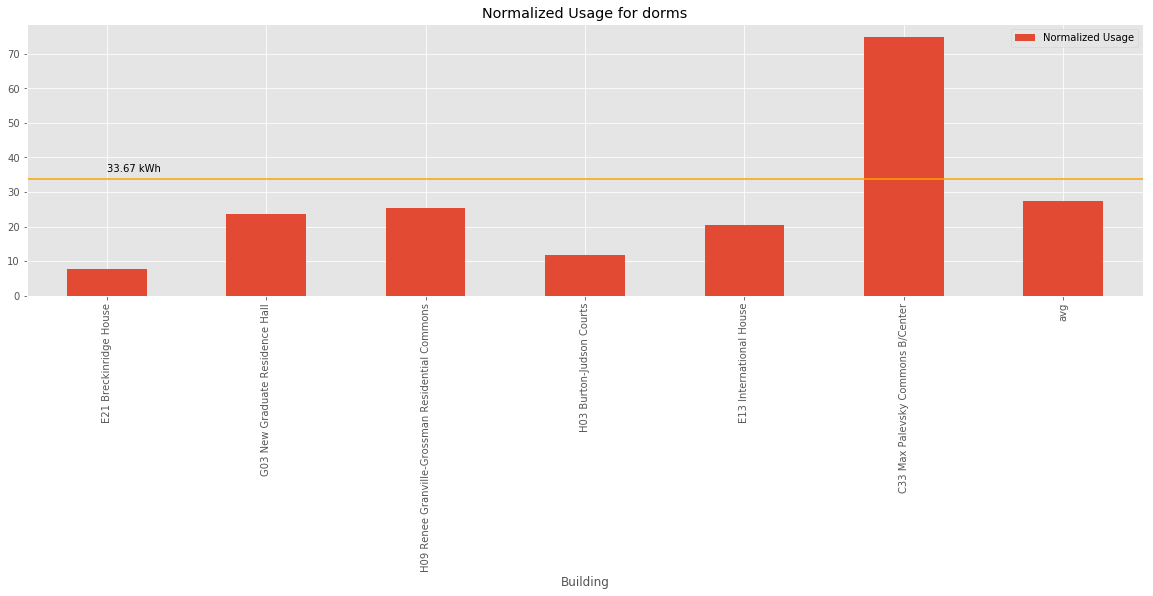

In [19]:
dormdf = graphGroup('Dorm')
dormdf.plot(x='Building', y='Normalized Usage', kind='bar', figsize=(20, 5)).annotate("33.67 kWh",(0, 36))
plt.axhline(y=33.67, color='orange')
plt.title('Normalized Usage for dorms')

In [20]:
poplst = [90, 200, 800,300, 500,700, 432]
poplst

[90, 200, 800, 300, 500, 700, 432]

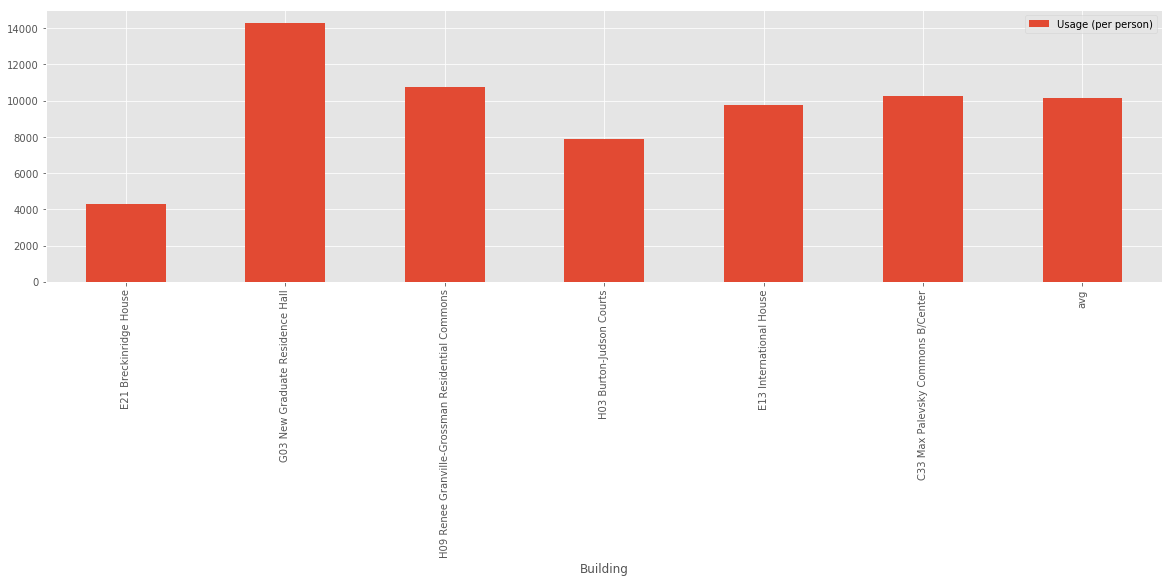

In [21]:
dormdf['Usage (per person)'] = dormdf['Usage']/poplst
dormdf.plot(x='Building', y='Usage (per person)', kind='bar', figsize=(20,5))

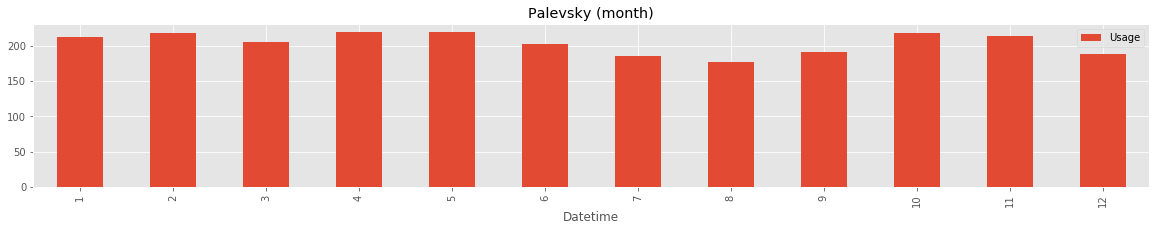

In [22]:
graphAny('C33', 'month')
plt.title('Palevsky (month)')

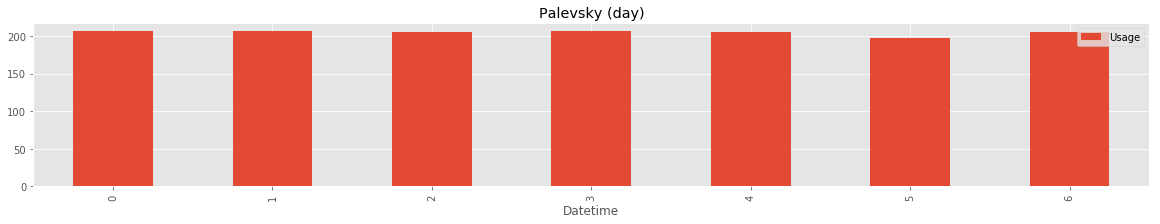

In [23]:
graphAny('C33', 'day')
plt.title('Palevsky (day)')

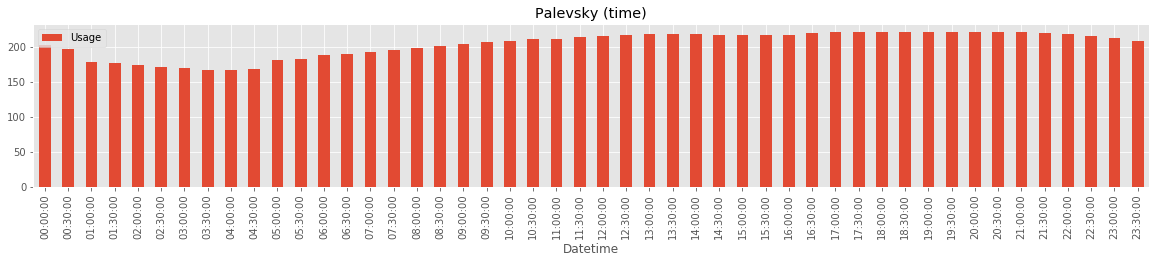

In [24]:
graphAny('C33', 'time')
plt.title('Palevsky (time)')

/Users/abisolaolawale/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


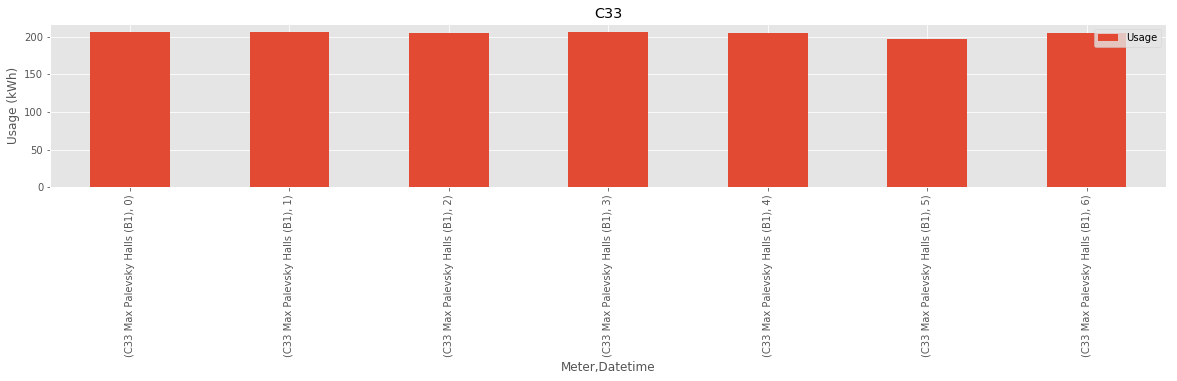

In [25]:
graphAnyMeter('C33', 'day')

In [26]:
dormdf

,Area,Building,Code,Normalized Usage,Usage,Year,Usage (per person)
0,50697.420000,E21 Breckinridge House,E21,7.654458,3.880613e+05,1916.000000,4311.792180
1,121452.480000,G03 New Graduate Residence Hall,G03,23.519714,2.856528e+06,1963.000000,14282.637876
2,338679.330000,H09 Renee Granville-Grossman Residential Commons,H09,25.417256,8.608299e+06,2009.000000,10760.373867
3,201402.160000,H03 Burton-Judson Courts,H03,11.776753,2.371863e+06,1931.000000,7906.211592
4,237120.340000,E13 International House,E13,20.570557,4.877697e+06,1932.000000,9755.394840
5,95682.000000,C33 Max Palevsky Commons B/Center,C33,74.855636,7.162337e+06,2002.000000,10231.909914
-1,174172.288333,avg,Average,27.299062,4.377464e+06,1958.833333,10133.019214


### Academic Offices

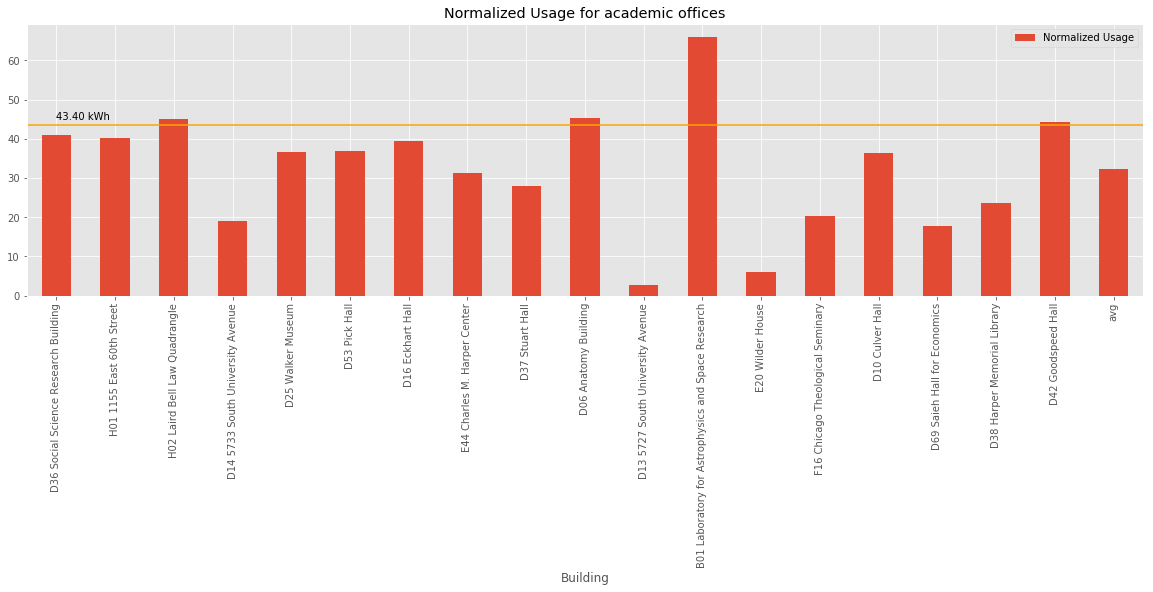

In [196]:
acadf = graphGroup('ACAD')
acadf.plot(x='Building', y='Normalized Usage', kind='bar', figsize=(20, 5)).annotate("43.40 kWh",(0, 45))
plt.axhline(y=43.40, color='orange')
plt.title('Normalized Usage for academic offices')

### Administrative offices

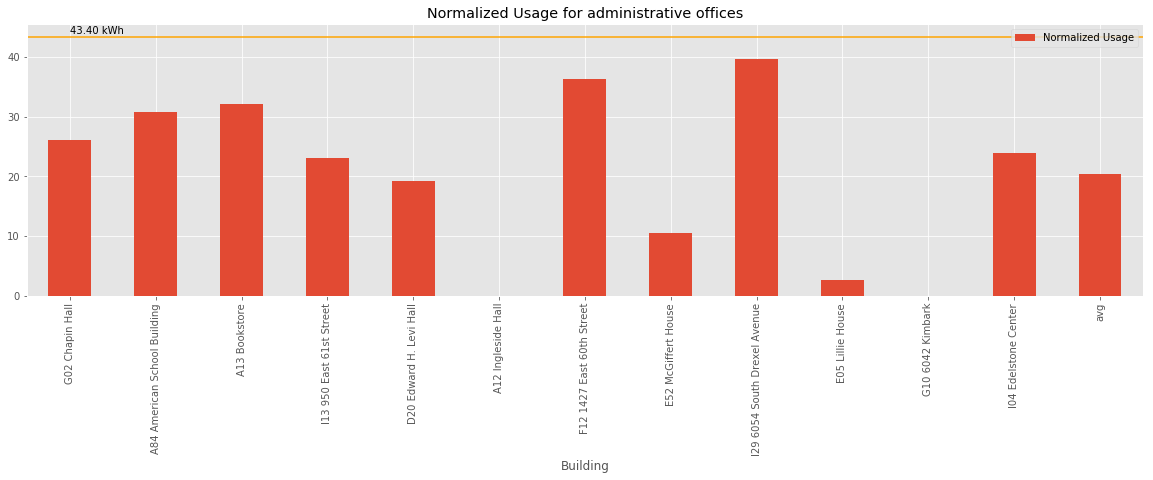

In [229]:
amdf = graphGroup('ADM')
amdf.plot(x='Building', y='Normalized Usage', kind='bar', figsize=(20,5)).annotate("43.40 kWh",(0, 44))
plt.axhline(y=43.40, color='orange')
plt.title('Normalized Usage for administrative offices')

### Libraries

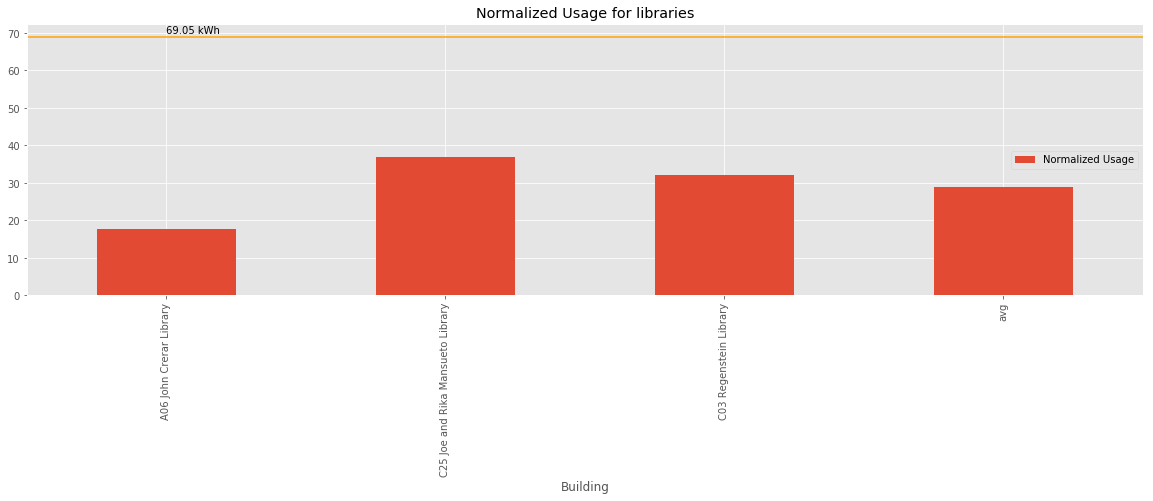

In [231]:
libdf = graphGroup('Library')
libdf.plot(x='Building', y='Normalized Usage', kind='bar', figsize=(20,5)).annotate("69.05 kWh",(0, 70))
plt.axhline(y=69.05, color='orange')
plt.title('Normalized Usage for libraries')

/Users/abisolaolawale/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


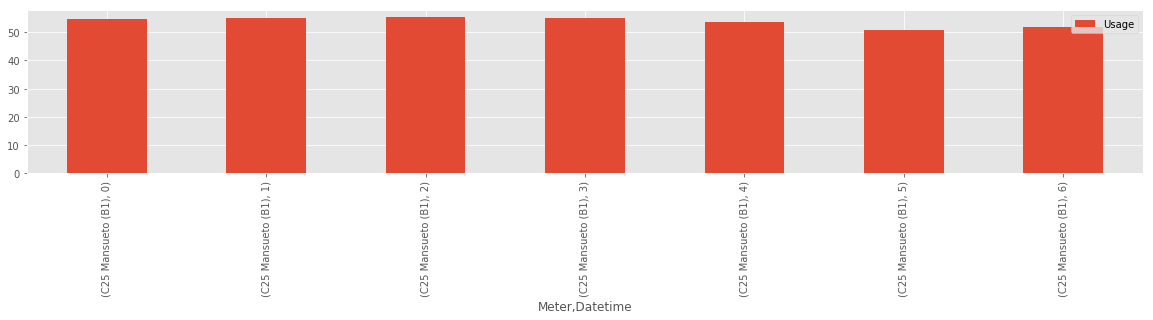

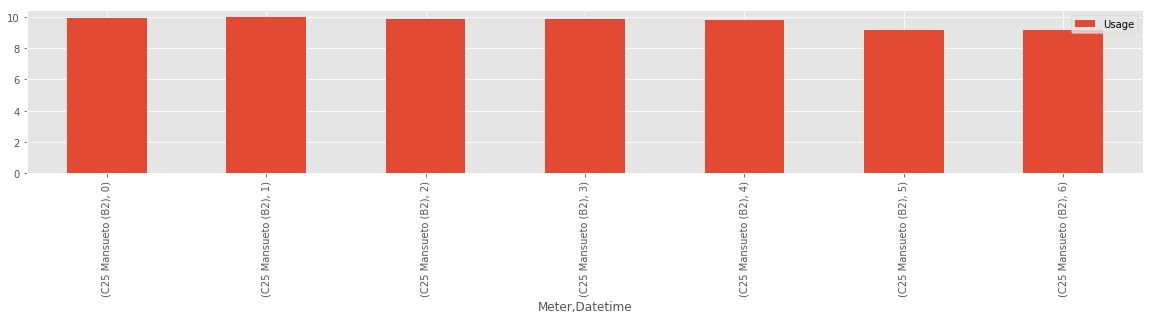

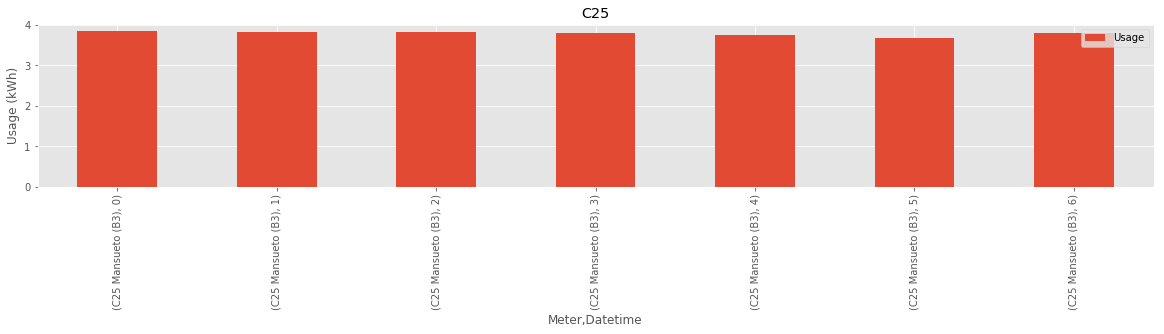

In [248]:
graphAnyMeter('C25', 'day')

### Residential

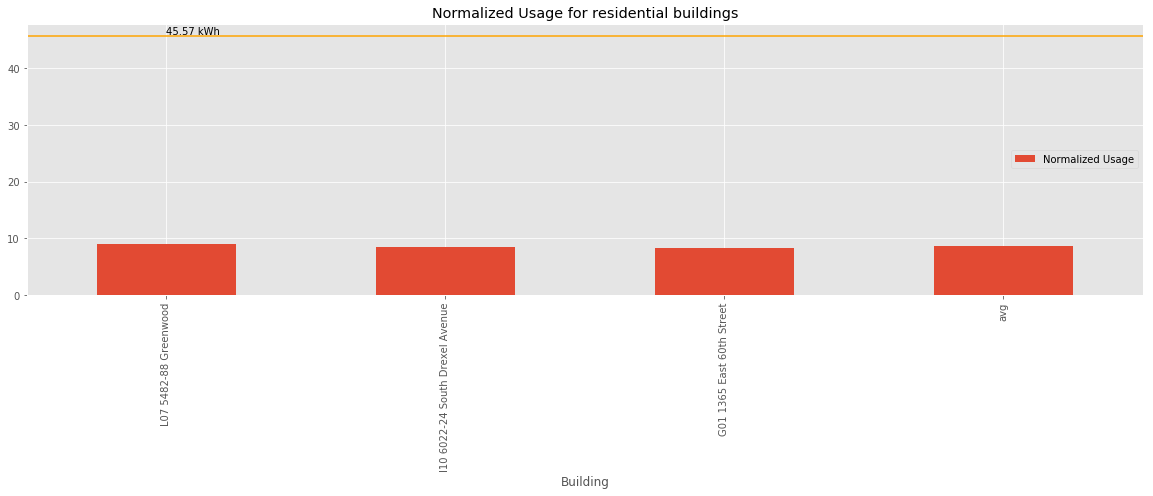

In [244]:
resdf = graphGroup('Residential')
resdf.plot(x='Building', y='Normalized Usage', kind='bar', figsize=(20,5)).annotate('45.57 kWh', (0, 46))
plt.axhline(y= 45.57, color='orange')
plt.title('Normalized Usage for residential buildings')

### Labs

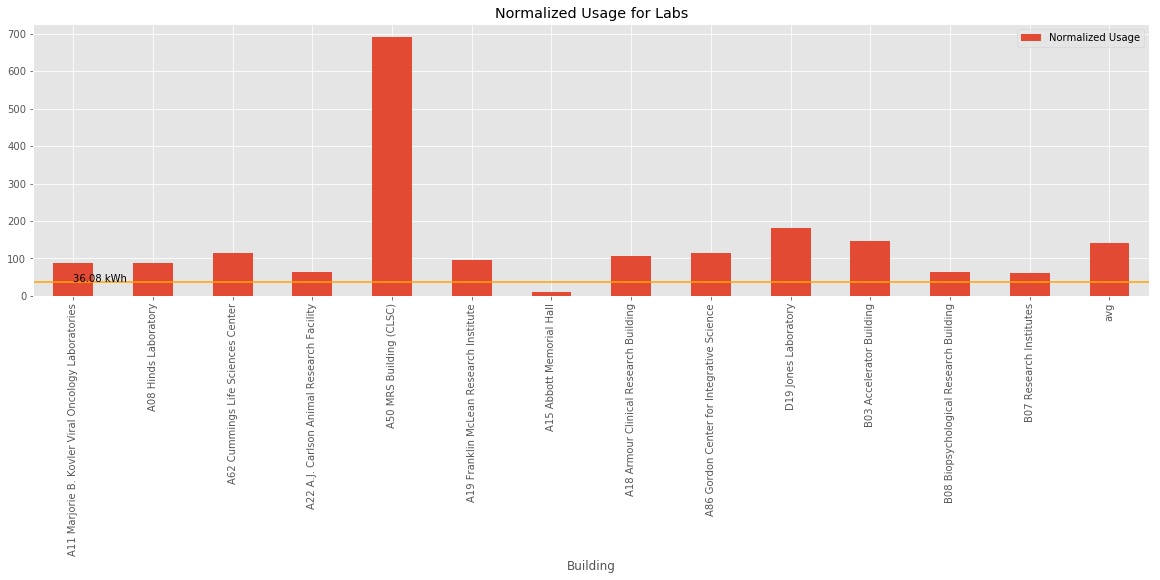

In [246]:
labdf = graphGroup('Lab')
labdf.plot(x='Building', y='Normalized Usage', kind='bar', figsize=(20, 5)).annotate('36.08 kWh', (0, 38))
plt.axhline(y=36.08, color='orange')
plt.title('Normalized Usage for Labs')

### Proportions

In [307]:
dormtot = dormdf['Usage'].sum()
acadtot = acadf['Usage'].sum()
labtot = labdf['Usage'].sum()
admtot = amdf['Usage'].sum()
libtot = libdf['Usage'].sum()

In [298]:
tot = cdf['Usage'].sum()

417069167.01770395

In [300]:
dormtot/tot

0.07347042775249726

In [308]:
acadtot/tot

0.13703797150941088

In [309]:
labtot/tot

0.38840069017259105

In [310]:
admtot/tot

0.04291295475922278

In [311]:
libtot/tot

0.07908454908391233